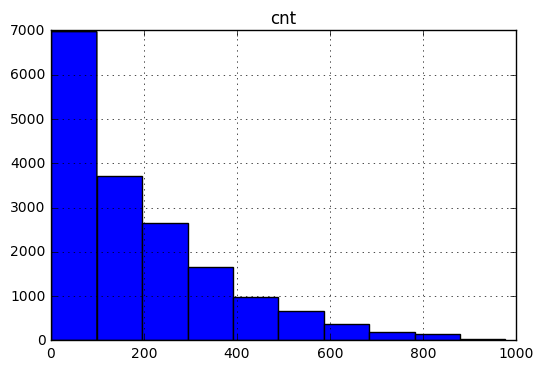

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
bike_rentals = pd.read_csv('bike_rental_hour.csv')

bike_rentals.hist('cnt')
plt.show()

In [2]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [3]:
def assign_label(hour):
    if hour>=6 and hour<12:
        label = 1
    elif hour>=12 and hour<18:
        label = 2
    elif hour>=18 and hour<=24:
        label = 3
    elif hour>=0 and hour<6:
        label = 4
    return label
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

In [4]:
train = bike_rentals.sample(frac=0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [5]:
cols = bike_rentals.columns.drop(['cnt', 'casual', 'registered', 'dteday', 'hr'])
print(cols)
print(bike_rentals.head())

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label'],
      dtype='object')
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10  

# Linear Regression Model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
regr = LinearRegression()
regr.fit(train[cols], train['cnt'])
y_pred = regr.predict(test[cols])
mse = mean_squared_error(test['cnt'], y_pred)
mae = mean_absolute_error(test['cnt'], y_pred)
mse, mae, bike_rentals['cnt'].std(), test['cnt'].std()

(18466.32285123811, 101.85822515493288, 181.38759909186527, 179.83431255538028)

The linear regression model results in a high error, we should be able improve the predictive power with a decision tree model

# Decision Tree Model

In [7]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=5)
tree.fit(train[cols], train['cnt'])
y_pred = tree.predict(test[cols])
mse = mean_squared_error(test['cnt'], y_pred)
mse

15526.122828427842

Using a decision tree regressor model greatly reduces error, by accounting for nonlinear feature predictors. Restricting the leaf and node split samples to 5 seems to further improve the model's predictions, while limiting the models depth below 20 worsens the model's predictions. A random forest model should perform even better with a less likelihood of overfitting. 

# Random Forest Model

In [8]:
from sklearn.ensemble import RandomForestRegressor
trees = RandomForestRegressor(n_estimators=50, min_samples_split=5)#, min_samples_leaf=1)
trees.fit(train[cols], train['cnt'])
y_pred = trees.predict(test[cols])
mse = mean_squared_error(test['cnt'], y_pred)
mse

10876.416324573554

A random forest regressor with 50-200 trees and with a minimum of ~5 samples in a node split offers the most accurate predictions of the models tried herein.